In [1]:
import pandas as pd
import numpy as np

In [2]:
# load your dataset
df = pd.read_csv("Desktop/#From Eghosa/#Python training/Python data cleaning/Practise 1/Netflix TV Shows and Movies.csv")

In [3]:
# view the data
df

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


In [4]:
# getting column headers
df.columns

Index(['index', 'id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [5]:
# list of column headers
list(df.columns)

['index',
 'id',
 'title',
 'type',
 'description',
 'release_year',
 'age_certification',
 'runtime',
 'imdb_id',
 'imdb_score',
 'imdb_votes']

In [6]:
# lets change the title header to movie_name and release year to year_of_release
# lets also utilise inplace = True to make the change permanent
df.rename(columns= {'title': 'movie_name',  'release_year': 'year_of_release'}, inplace= 'True')


In [7]:
# next lets put a new column status based on the year of release of the movie
# anything older than 2020 will be old and anything more recent will be new
df.insert(6, 'status',  np.where(df['year_of_release'] < 2020, 'old', 'new') )

In [8]:
df.columns


Index(['index', 'id', 'movie_name', 'type', 'description', 'year_of_release',
       'status', 'age_certification', 'runtime', 'imdb_id', 'imdb_score',
       'imdb_votes'],
      dtype='object')

In [9]:
df.head(2)



,index,id,movie_name,type,description,year_of_release,status,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,old,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,old,PG,91,tt0071853,8.2,530877.0


In [10]:
# lets try to get the movie name details only
df.movie_name

0                              Taxi Driver
1          Monty Python and the Holy Grail
2                            Life of Brian
3                             The Exorcist
4             Monty Python's Flying Circus
                       ...                
5278           Momshies! Your Soul is Mine
5279                             Fine Wine
5280                                 Clash
5281                        Shadow Parties
5282    Mighty Little Bheem: Kite Festival
Name: movie_name, Length: 5283, dtype: object

In [11]:
# lets try split each word in the movie_name column temporarily
df.movie_name.str.split(" ")

0                                 [Taxi, Driver]
1         [Monty, Python, and, the, Holy, Grail]
2                              [Life, of, Brian]
3                                [The, Exorcist]
4              [Monty, Python's, Flying, Circus]
                          ...                   
5278           [Momshies!, Your, Soul, is, Mine]
5279                                [Fine, Wine]
5280                                     [Clash]
5281                           [Shadow, Parties]
5282    [Mighty, Little, Bheem:, Kite, Festival]
Name: movie_name, Length: 5283, dtype: object

In [12]:
# lets edit the imdb_id column
df.head(1)

,index,id,movie_name,type,description,year_of_release,status,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,old,R,113,tt0075314,8.3,795222.0


In [13]:
# we wanna get ride of unessary words but first lets call our column
# df.imdb_id or use
df['imdb_id']

0        tt0075314
1        tt0071853
2        tt0079470
3        tt0070047
4        tt0063929
           ...    
5278    tt14412240
5279    tt13857480
5280    tt14620732
5281    tt10168094
5282    tt13711094
Name: imdb_id, Length: 5283, dtype: object

In [14]:
# lets replace tt with imdb
df['imdb_id'] = df['imdb_id'].str.replace('tt', 'imdb')

In [15]:
df.head(1)

,index,id,movie_name,type,description,year_of_release,status,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,old,R,113,imdb0075314,8.3,795222.0


### Finding a str and expression

#### str.filter
#### str.match
#### str.contains

In [16]:
# lets look at age certification
#df.head(1)
df['age_certification']

0           R
1          PG
2           R
3           R
4       TV-14
        ...  
5278      NaN
5279      NaN
5280      NaN
5281      NaN
5282      NaN
Name: age_certification, Length: 5283, dtype: object

In [17]:
df['age_certification'].str.contains('R')

0        True
1       False
2        True
3        True
4       False
        ...  
5278      NaN
5279      NaN
5280      NaN
5281      NaN
5282      NaN
Name: age_certification, Length: 5283, dtype: object

In [18]:
# we want to drill down to our data frame where the age certification or age rating (if you change it), contains R
# Unfortunately it wont work till we drop na
df[df['age_certification'].str.contains('R')]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [ ]:
# first lets find out how many na values there are;
df.isna().sum().sum()

In [ ]:
df = df.dropna()

In [ ]:
# now no na value exists and now we can further slice down
df.head(2)

In [ ]:
# now we can filter our df by just where contains R in age certification
# df[df['age_certification'].str.contains('R')].head()   you can do this to select top 5
df[df['age_certification'].str.contains('R')].head()

In [24]:
# we want to look at the entire dataframe where imdb_score is greater than 8 and year of release is greater than 2000
df[(df['imdb_score'] > 8.9) & (df['year_of_release'] > 2000)].head(3)

,index,id,movie_name,type,description,year_of_release,status,age_certification,runtime,imdb_id,imdb_score,imdb_votes
229,229,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,old,TV-MA,48,imdb0903747,9.5,1727694.0
245,245,ts3371,Avatar: The Last Airbender,SHOW,"In a war-torn world of elemental magic, a youn...",2005,old,TV-Y7,24,imdb0417299,9.3,297336.0
256,256,ts11313,DEATH NOTE,SHOW,Light Yagami is an ace student with great pros...,2006,old,TV-14,24,imdb0877057,9.0,302147.0


In [25]:
# Its cool but lets zoom down to specific columns
# we return just the movie name, year of release and imdb score (not the entire df
# we could use: 
df[['movie_name', 'imdb_score', 'year_of_release']][(df['imdb_score'] > 8.9) & (df['year_of_release'] > 2000)]
# I observed that lots of anime shows had ratings 9.0 and over and as an anime fan I'm happy


,movie_name,imdb_score,year_of_release
229,Breaking Bad,9.5,2008
245,Avatar: The Last Airbender,9.3,2005
256,DEATH NOTE,9.0,2006
622,Khawatir,9.6,2005
673,Hunter x Hunter,9.0,2011
822,Chhota Bheem & Krishna in Mayanagari,9.0,2011
860,Attack on Titan,9.0,2013
1033,"Raja, Rasoi Aur Anya Kahaniyaan",9.0,2014
1189,Leah Remini: Scientology and the Aftermath,9.0,2016
1346,Reply 1988,9.2,2015


In [26]:
# alternatively we could go with the .query method (just for these 3 columns and lets just call 3 rows)
df.query('imdb_score > 8.9 and year_of_release > 2000')[['movie_name', 'imdb_score', 'year_of_release']].head(3)

,movie_name,imdb_score,year_of_release
229,Breaking Bad,9.5,2008
245,Avatar: The Last Airbender,9.3,2005
256,DEATH NOTE,9.0,2006


In [37]:
df.columns

Index(['index', 'id', 'movie_name', 'type', 'description', 'year_of_release',
       'status', 'age_certification', 'runtime', 'imdb_id', 'imdb_score',
       'imdb_votes'],
      dtype='object')

array([<Axes: xlabel='index'>, <Axes: xlabel='index'>,
       <Axes: xlabel='index'>, <Axes: xlabel='index'>], dtype=object)

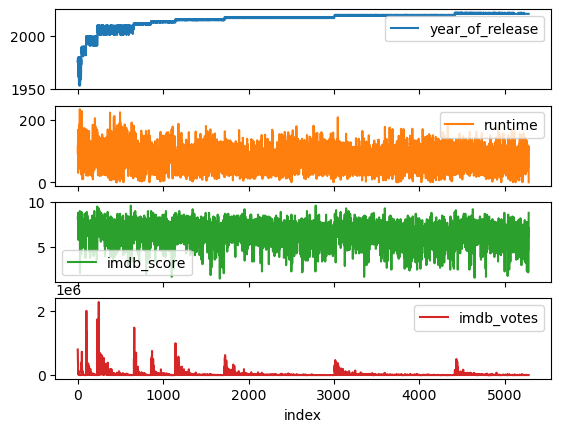

In [38]:
df.set_index('index').plot(subplots = True)

now we're done lets export to csv

In [ ]:
# Export to CSV
df.to_csv('Desktop/#From Eghosa/#Python training/Python data cleaning/Practise 1/cleaned_data.csv', index=False)
